<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 2 - LEVEL 1**

---


# Customer Segmentation Analysis


## 1) Data collection

In [ ]:
import pandas as pd
df = pd.read_csv('/content/ifood_df.csv')

## 2) Data Exploration and cleaning

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
print(df.isnull().sum())
print("\n\n\nduplicate rows:")
print(df.duplicated().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
print(df.shape)

(2205, 39)


                        Income   Kidhome  Teenhome   Recency  MntWines  \
Income                1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome              -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome              0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency               0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines              0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits             0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts       0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts       0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts      0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds          0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases    -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases       0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases   0.710057 -0.5198

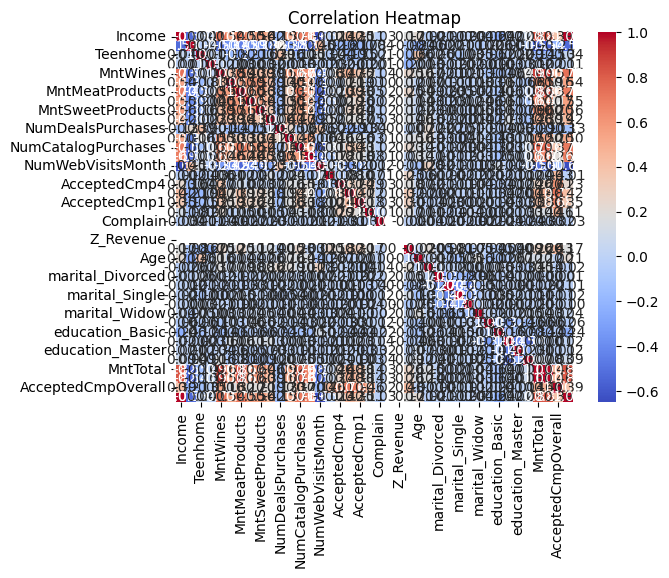

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 3) Descriptive Statistics

In [ ]:
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
print("total purchases\n",df['TotalPurchases'].head())
# Create a "Total Spending" column
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print("\ntotal spending\n",df['TotalSpending'].head())

total purchases
 0    25
1     6
2    21
3     8
4    19
Name: TotalPurchases, dtype: int64

total spending
 0    1617
1      27
2     776
3      53
4     422
Name: TotalSpending, dtype: int64


In [ ]:
import numpy as np
df['APV'] = np.where(df['TotalPurchases'] > 0, df['TotalSpending'] / df['TotalPurchases'], 0)
print(f"Average Purchase Value: {df['APV'].mean():.2f}")


Average Purchase Value: 32.59


In [ ]:
avg_frequency = df['TotalPurchases'].mean()
print(f"Average Purchase Frequency: {avg_frequency:.2f}")


Average Purchase Frequency: 14.89


marital_Married
0    617.683198
1    589.639344
Name: TotalSpending, dtype: float64


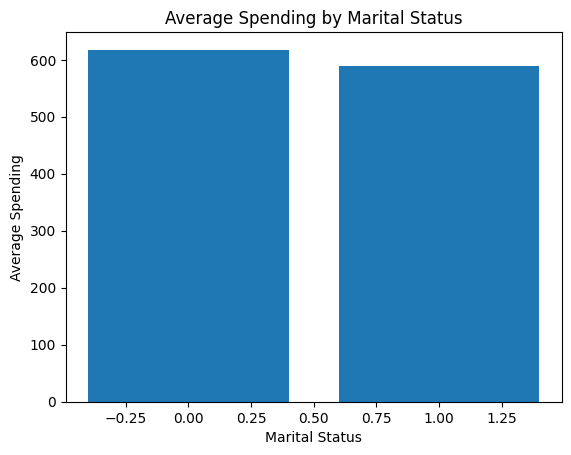

In [ ]:
marital_spending = df.groupby('marital_Married')['TotalSpending'].mean().sort_values(ascending=False)
print(marital_spending)
plt.bar(marital_spending.index, marital_spending.values)
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.title('Average Spending by Marital Status')
plt.show()

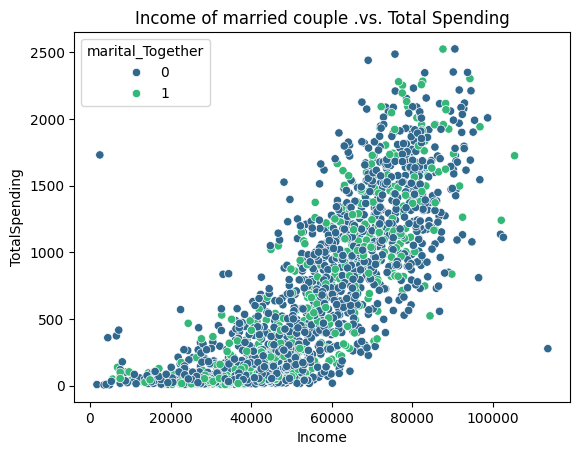

In [ ]:
sns.scatterplot(data=df, x='Income', y='TotalSpending', hue='marital_Together', palette='viridis')
plt.title('Income of married couple .vs. Total Spending')
plt.show()


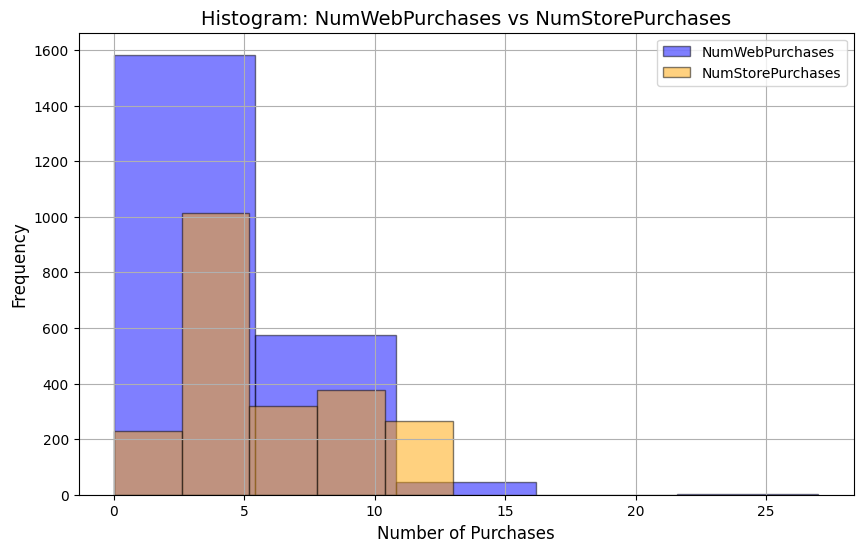

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['NumWebPurchases'], bins=5, alpha=0.5, label='NumWebPurchases', color='blue', edgecolor='black')
plt.hist(df['NumStorePurchases'], bins=5, alpha=0.5, label='NumStorePurchases', color='orange', edgecolor='black')

# Add plot details
plt.title('Histogram: NumWebPurchases vs NumStorePurchases', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 4) Customer Segmentation

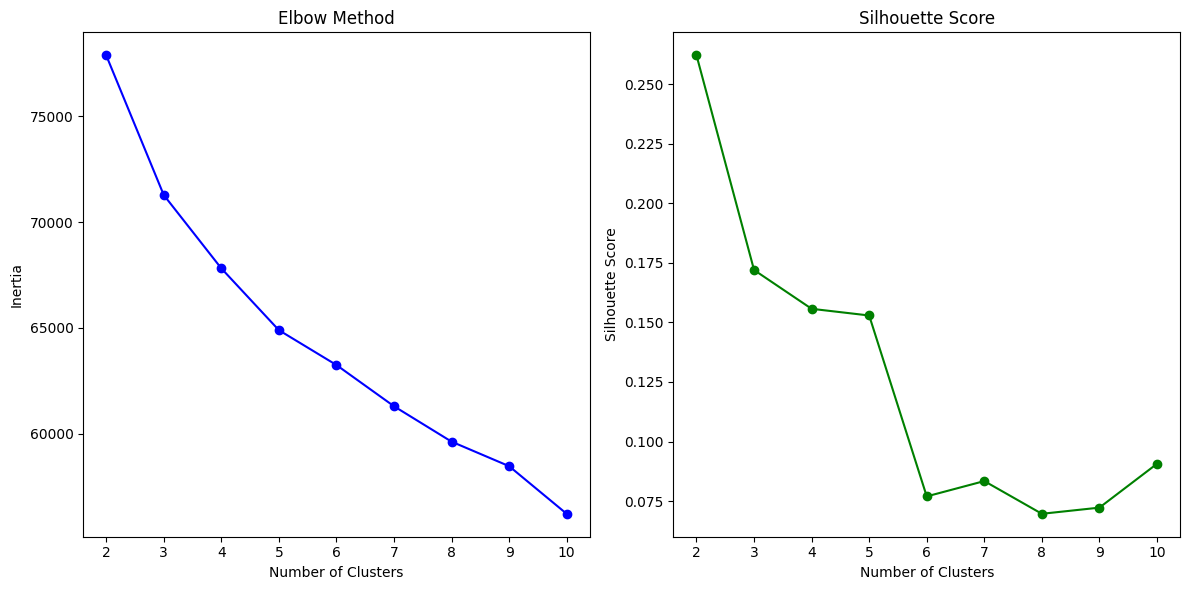

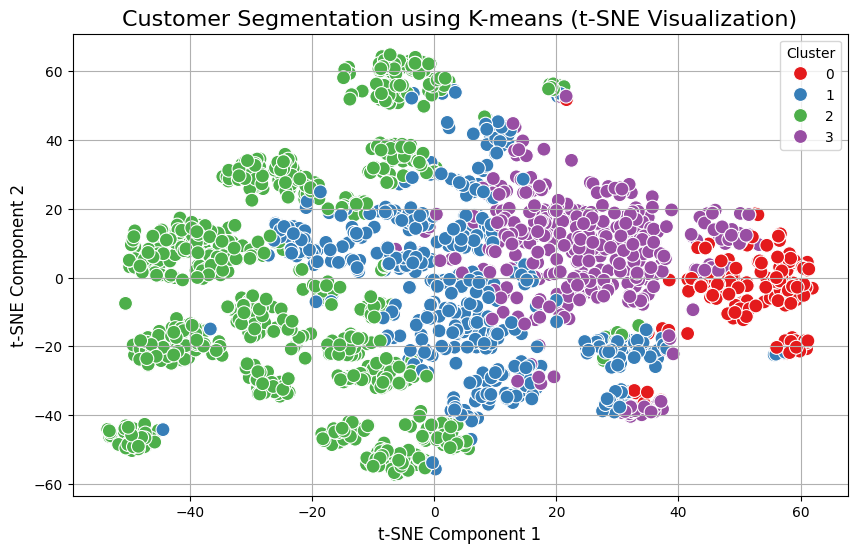

Cluster Profiles:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        82056.412791  0.052326  0.145349  47.819767  914.552326  55.000000   
1        56488.100173  0.253886  0.861831  47.207254  391.604491  21.749568   
2        33973.987052  0.791833  0.454183  49.314741   38.707171   4.805777   
3        73103.384444  0.053333  0.304444  51.100000  560.420000  69.646667   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             485.651163        81.529070         65.523256     77.889535   
1             120.613126        29.202073         22.063903     57.207254   
2              21.869522         7.097610          4.859562     15.380478   
3             420.420000       100.435556         68.653333     78.186667   

         ...  zscore_income  TotalPurchases 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

df['TotalPurchases'] = df['NumWebPurchases'] + df['NumStorePurchases']
df['AvgSpendPerCategory'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].mean(axis=1)
df['PurchaseFrequency'] = df['NumWebPurchases'] / (df['NumWebVisitsMonth'] + 1)  # Prevent division by zero

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

def find_optimal_k(scaled_data):
    inertia = []
    silhouette_scores = []

    for k in range(2, 11):  # Try K from 2 to 10
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), inertia, marker='o', color='blue')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

find_optimal_k(scaled_data)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)
df['TSNE1'], df['TSNE2'] = tsne_components[:, 0], tsne_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='Set1', data=df, s=100, marker='o')
plt.title('Customer Segmentation using K-means (t-SNE Visualization)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

cluster_profiles = df.groupby('Cluster').mean()
print("Cluster Profiles:")
print(cluster_profiles)


## 5) visualization

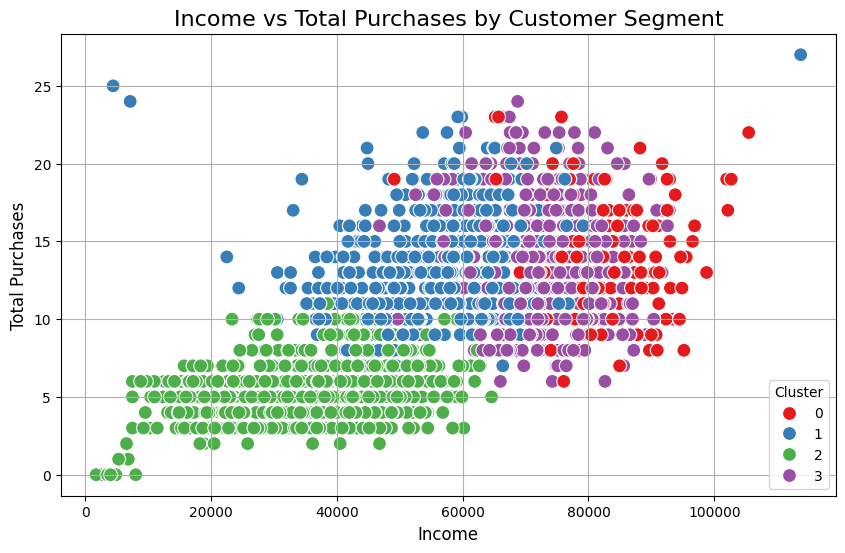

In [ ]:
# Scatter plot of Income vs TotalPurchases with cluster colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalPurchases', hue='Cluster', palette='Set1', data=df, s=100, marker='o')
plt.title('Income vs Total Purchases by Customer Segment', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 6) Insights and Recommendations


### **K-means Clustering Analysis for Customer Segmentation**

This section presents the results of the K-means clustering analysis aimed at identifying distinct customer segments based on their behavior and purchase patterns. The analysis utilized features like **Income**, **Age**, **NumWebPurchases**, **NumStorePurchases**, and other purchase-related features.

**Optimal Number of Clusters = 4**

Both the **Elbow Method** and **Silhouette Analysis** pointed to **4 clusters** (k=4) as the optimal number of clusters. The elbow method showed a diminishing return in variance explained after 4 clusters, while the silhouette score was highest for k=4, indicating well-separated and cohesive clusters.

---

### **Cluster Characteristics**

#### **Cluster 0: High-Value Frequent Shoppers**
- **Percentage of Total Customers**: 28%
- **Key Features**:
  - **High income**.
  - High purchase frequency both online and in-store.
  - **Premium spending** on items like `MntWines`, `MntMeatProducts`, `MntGoldProds`.
  - Typically **frequent online shoppers**.
  
#### **Cluster 1: Low-Value Occasional Shoppers**
- **Percentage of Total Customers**: 24%
- **Key Features**:
  - **Low income**.
  - **Infrequent purchases**, often made during promotional periods.
  - Minimal engagement with web and store purchases.
  - Primarily buy low-cost products or in response to discounts.
  
#### **Cluster 2: High-Value Infrequent Shoppers**
- **Percentage of Total Customers**: 18%
- **Key Features**:
  - **High income** but make fewer purchases.
  - High-value transactions on premium products like `MntWines` and `MntGoldProds`.
  - **Infrequent shopping habits**, though each purchase is substantial.
  
#### **Cluster 3: Moderate-Value Regular Shoppers**
- **Percentage of Total Customers**: 30%
- **Key Features**:
  - **Moderate income**.
  - **Regular purchases** with balanced spending across various categories.
  - Purchase both online and in-store at similar frequencies.
  
---

### **Recommendations**

#### **Marketing Strategies for Each Cluster**

---

#### **Cluster 0: High-Value Frequent Shoppers**
- **Key Insights**: This segment consists of **high-income, frequent shoppers** who spend significantly on premium products like wine, meat, and gold-related items.
- **Marketing Strategy**:
  - Promote **exclusive, high-end products** such as **premium wines**, **luxury foods**, and **exclusive event invites**.
  - Introduce **VIP memberships** with personalized offers and rewards for frequent shopping.
  - Use **personalized email marketing** highlighting premium items and upcoming sales.

---

#### **Cluster 1: Low-Value Occasional Shoppers**
- **Key Insights**: This group includes **low-income, infrequent buyers** who only make purchases when there are special offers or discounts.
- **Marketing Strategy**:
  - Offer **time-limited discounts** or **flash sales** to encourage more frequent purchases.
  - Promote **budget-friendly products** to align with their purchasing power.
  - Introduce a **loyalty program** that rewards small but consistent purchases over time.

---

#### **Cluster 2: High-Value Infrequent Shoppers**
- **Key Insights**: High-income but **infrequent** buyers, primarily purchasing premium items like wines and luxury goods.
- **Marketing Strategy**:
  - Target them with **exclusive, limited-time offers** on high-end items they’ve shown interest in.
  - Use **remarketing** ads to bring them back to purchase similar premium products.
  - Introduce **personalized shopping experiences**, such as exclusive previews of new premium products.

---

#### **Cluster 3: Moderate-Value Regular Shoppers**
- **Key Insights**: This segment is composed of **moderate-income, regular shoppers** who buy across various product categories, both online and in-store.
- **Marketing Strategy**:
  - Offer **product bundles** or **multi-buy discounts** to increase their average spend.
  - Use **cross-channel promotions** (e.g., in-store discounts on online purchases).
  - Create **personalized recommendations** based on their varied interests and purchase history.

---

### **Opportunities for Further Analysis**

- **Exploring Children’s Impact**: Investigate how having children influences product preferences and purchasing behavior, particularly in clusters like Cluster 3 (which is more family-oriented).
  
- **Educational Influence**: Analyzing how education level affects purchasing patterns could provide valuable insights, especially in **Cluster 0** (high-income, family-oriented) vs **Cluster 1** (low-income, occasional shoppers).

- **Frequent Buyers**: Identify the **frequent buyers** across all clusters, to focus on retaining them with loyalty programs or exclusive offers.

- **Sales Channel Analysis**: Further exploration of **sales channels** (store vs website) would help refine strategies for each cluster. For example, **Cluster 0** might respond better to online promotions, while **Cluster 3** may prefer in-store shopping.

- **Marketing Campaign Response**: Study how each cluster responds to different marketing campaigns (e.g., email vs social media) to optimize future strategies.

- **Gender Data**: Adding **gender data** could further refine insights, particularly in segmentation strategies targeting specific demographics.

- **Testing Other Clustering Algorithms**: While **K-means** was effective, trying other clustering algorithms like **DBSCAN** or **Agglomerative Clustering** could offer additional segmentation insights.

---

### **Conclusion**

The customer segmentation analysis has provided key insights into how different customer groups behave based on their income, relationship status, and purchase patterns. By understanding these distinct segments, businesses can develop targeted, tailored marketing strategies that will increase customer engagement, retention, and sales.

Each cluster requires a unique approach, whether it’s promoting high-end products to frequent shoppers, offering discounts to occasional buyers, or creating personalized experiences for infrequent luxury shoppers. Further exploration of additional features, such as children’s influence or gender, could further refine these insights.
\